In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [3]:
# Step 2: Load the Data
# Load the dataset
url = 'https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/master/data/retail-data/all/online-retail-dataset.csv'
df = pd.read_csv(url, encoding='latin1')


In [4]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get basic information
print(df.info())

# Summary statistics
print(df.describe())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [5]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Handle missing values by dropping rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


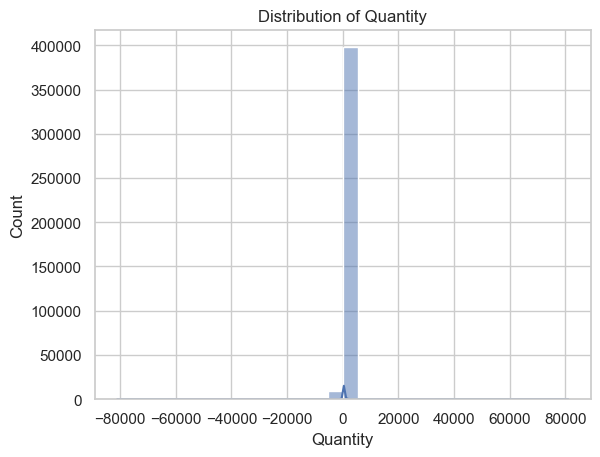

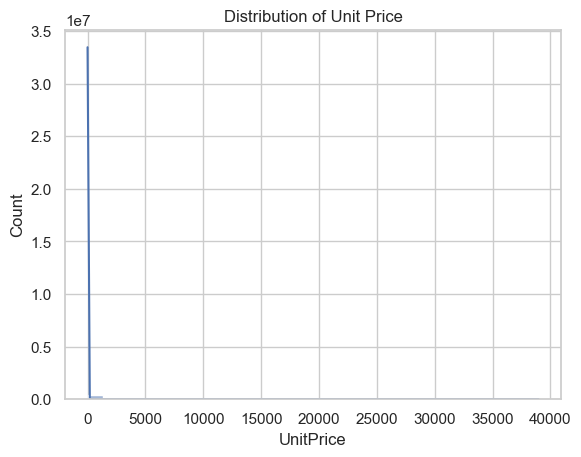

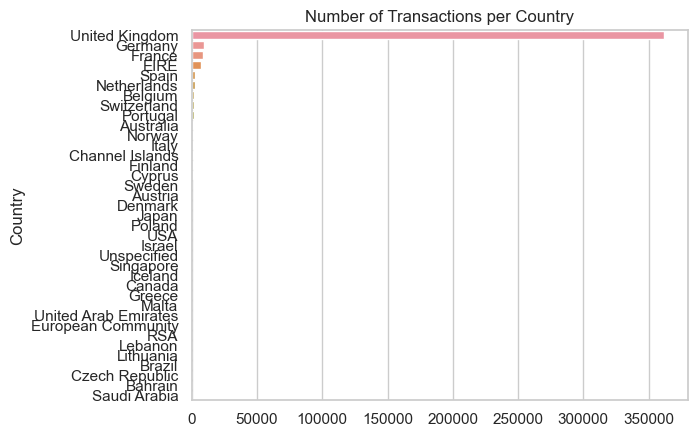

In [6]:
# Step 5: Data Visualization
# Distribution of Quantity
sns.histplot(df['Quantity'], kde=True, bins=30)
plt.title('Distribution of Quantity')
plt.show()

# Distribution of Unit Price
sns.histplot(df['UnitPrice'], kde=True, bins=30)
plt.title('Distribution of Unit Price')
plt.show()

# Number of transactions per country
country_counts = df['Country'].value_counts()
sns.barplot(y=country_counts.index, x=country_counts.values)
plt.title('Number of Transactions per Country')
plt.show()


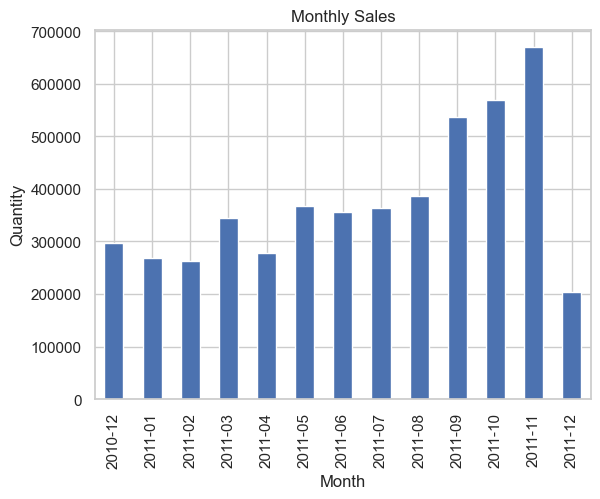

In [7]:
# Step 6: Univariate Analysis
# Distribution of Invoice Date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['Quantity'].sum()
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()


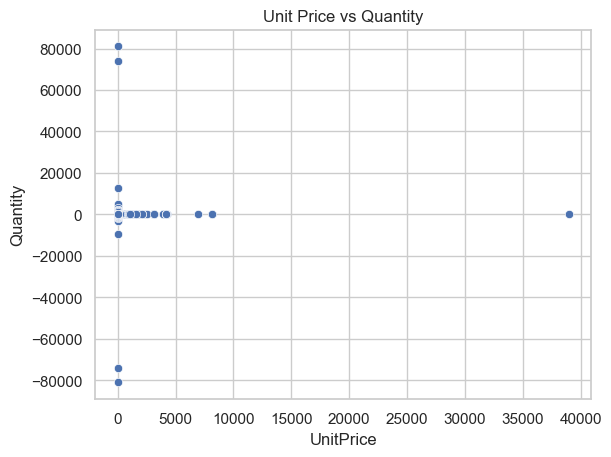

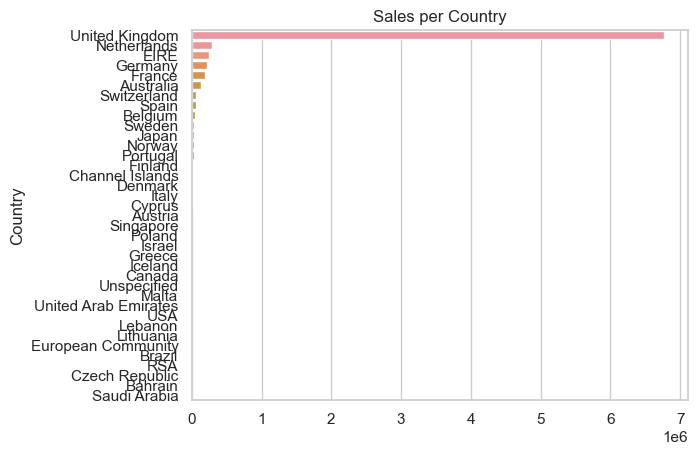

In [8]:
# Step 7: Bivariate Analysis
# Unit Price vs Quantity
sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title('Unit Price vs Quantity')
plt.show()

# Sales per Country
df['Sales'] = df['Quantity'] * df['UnitPrice']
sales_per_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
sns.barplot(y=sales_per_country.index, x=sales_per_country.values)
plt.title('Sales per Country')
plt.show()


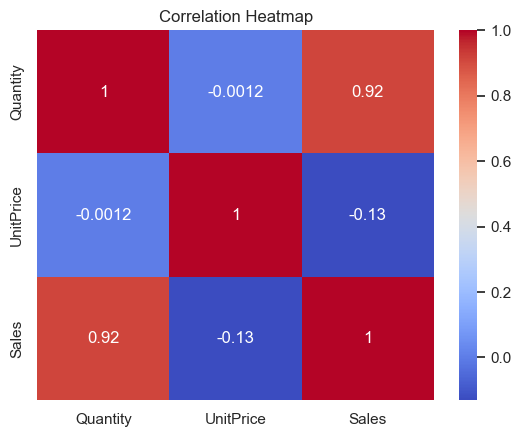

In [9]:
# Step 8: Multivariate Analysis
# Correlation heatmap
correlation_matrix = df[['Quantity', 'UnitPrice', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


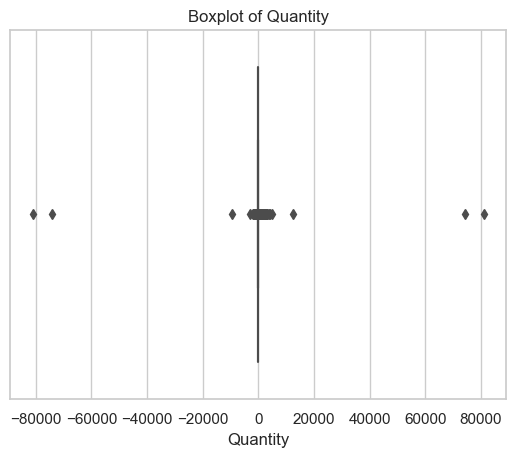

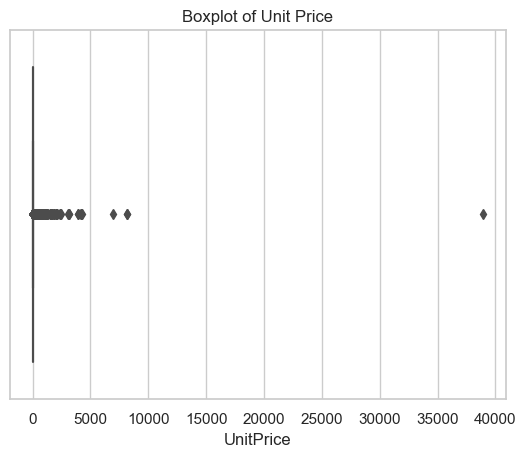

In [10]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in Quantity
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

# Removing outliers from Quantity
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in Unit Price
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot of Unit Price')
plt.show()


In [11]:
# Step 10: Feature Engineering
# Create additional features if needed
# For example, calculate total sales per invoice
df['TotalSales'] = df['Quantity'] * df['UnitPrice']


In [12]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Quantity distribution
quantity_dist = df['Quantity'].describe()
print(f"Quantity Distribution:\n{quantity_dist}")

# Average unit price
avg_unit_price = df['UnitPrice'].mean()
print(f"Average Unit Price: {avg_unit_price}")

# Top countries by sales
top_countries_by_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
print(f"Top 10 Countries by Sales:\n{top_countries_by_sales}")

# Monthly sales trend
print("Monthly sales trend indicates seasonality in the sales data.")


Key Insights:
Quantity Distribution:
count    380147.000000
mean          6.819738
std           6.764910
min         -13.000000
25%           2.000000
50%           4.000000
75%          12.000000
max          27.000000
Name: Quantity, dtype: float64
Average Unit Price: 3.598044977337716
Top 10 Countries by Sales:
Country
United Kingdom    4307366.254
Germany            178744.250
France             156846.230
EIRE               137057.290
Switzerland         40769.910
Spain               40159.220
Belgium             37396.820
Netherlands         30008.800
Norway              25840.080
Portugal            25032.610
Name: Sales, dtype: float64
Monthly sales trend indicates seasonality in the sales data.


Findings:
1. Quantity and Unit Price Distribution: Understanding the distribution of quantities and unit prices helps in identifying typical order sizes and pricing patterns.
2. Sales per Country: Analyzing sales per country provides insights into the geographic distribution of the customers and potential market opportunities.
3. Monthly Sales Trend: Identifying trends in monthly sales helps in understanding seasonal patterns and planning inventory and marketing strategies.
4. Correlations: The correlation heatmap provides insights into the relationships between different numerical variables, such as quantity, unit price, and total sales.